In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from dmba import plotDecisionTree, classificationSummary, regressionSummary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("C:/Users/femym/Downloads/BIA Sem 3/ML/lab2/Coviddeathdata.csv")
print(df.head(10))

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
5      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
6      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
7      AFG      Asia  Afghanistan  2020-01-10          NaN        0.0   
8      AFG      Asia  Afghanistan  2020-01-11          NaN        0.0   
9      AFG      Asia  Afghanistan  2020-01-12          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN       

In [331]:
df1 = df.loc[:, ['continent', 'location','total_cases','total_deaths','total_tests','total_vaccinations','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','population_density','cardiovasc_death_rate','diabetes_prevalence','life_expectancy','population']]
df1

,continent,location,total_cases,total_deaths,total_tests,total_vaccinations,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,population_density,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,population
0,Asia,Afghanistan,NaN,NaN,NaN,NaN,18.6,2.581,1.337,1803.987,NaN,54.422,597.029,9.59,64.83,41128772
1,Asia,Afghanistan,NaN,NaN,NaN,NaN,18.6,2.581,1.337,1803.987,NaN,54.422,597.029,9.59,64.83,41128772
2,Asia,Afghanistan,NaN,NaN,NaN,NaN,18.6,2.581,1.337,1803.987,NaN,54.422,597.029,9.59,64.83,41128772
3,Asia,Afghanistan,NaN,NaN,NaN,NaN,18.6,2.581,1.337,1803.987,NaN,54.422,597.029,9.59,64.83,41128772
4,Asia,Afghanistan,NaN,NaN,NaN,NaN,18.6,2.581,1.337,1803.987,NaN,54.422,597.029,9.59,64.83,41128772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325406,Africa,Zimbabwe,265604.0,5709.0,NaN,NaN,19.6,2.822,1.882,1899.775,21.4,42.729,307.846,1.82,61.49,16320539
325407,Africa,Zimbabwe,265604.0,5709.0,NaN,NaN,19.6,2.822,1.882,1899.775,21.4,42.729,307.846,1.82,61.49,16320539
325408,Africa,Zimbabwe,265604.0,5709.0,NaN,NaN,19.6,2.822,1.882,1899.775,21.4,42.729,307.846,1.82,61.49,16320539
325409,Africa,Zimbabwe,265604.0,5709.0,NaN,NaN,19.6,2.822,1.882,1899.775,21.4,42.729,307.846,1.82,61.49,16320539


In [332]:
grouped_df = df.groupby(['continent', 'location'])
# Calculate the mean of multiple columns within each group
columns_to_mean = ['total_cases','total_deaths','total_tests','total_vaccinations','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','population_density','cardiovasc_death_rate','diabetes_prevalence','life_expectancy','population']
mean_df = grouped_df[columns_to_mean].mean()

# Print the mean_values DataFrame

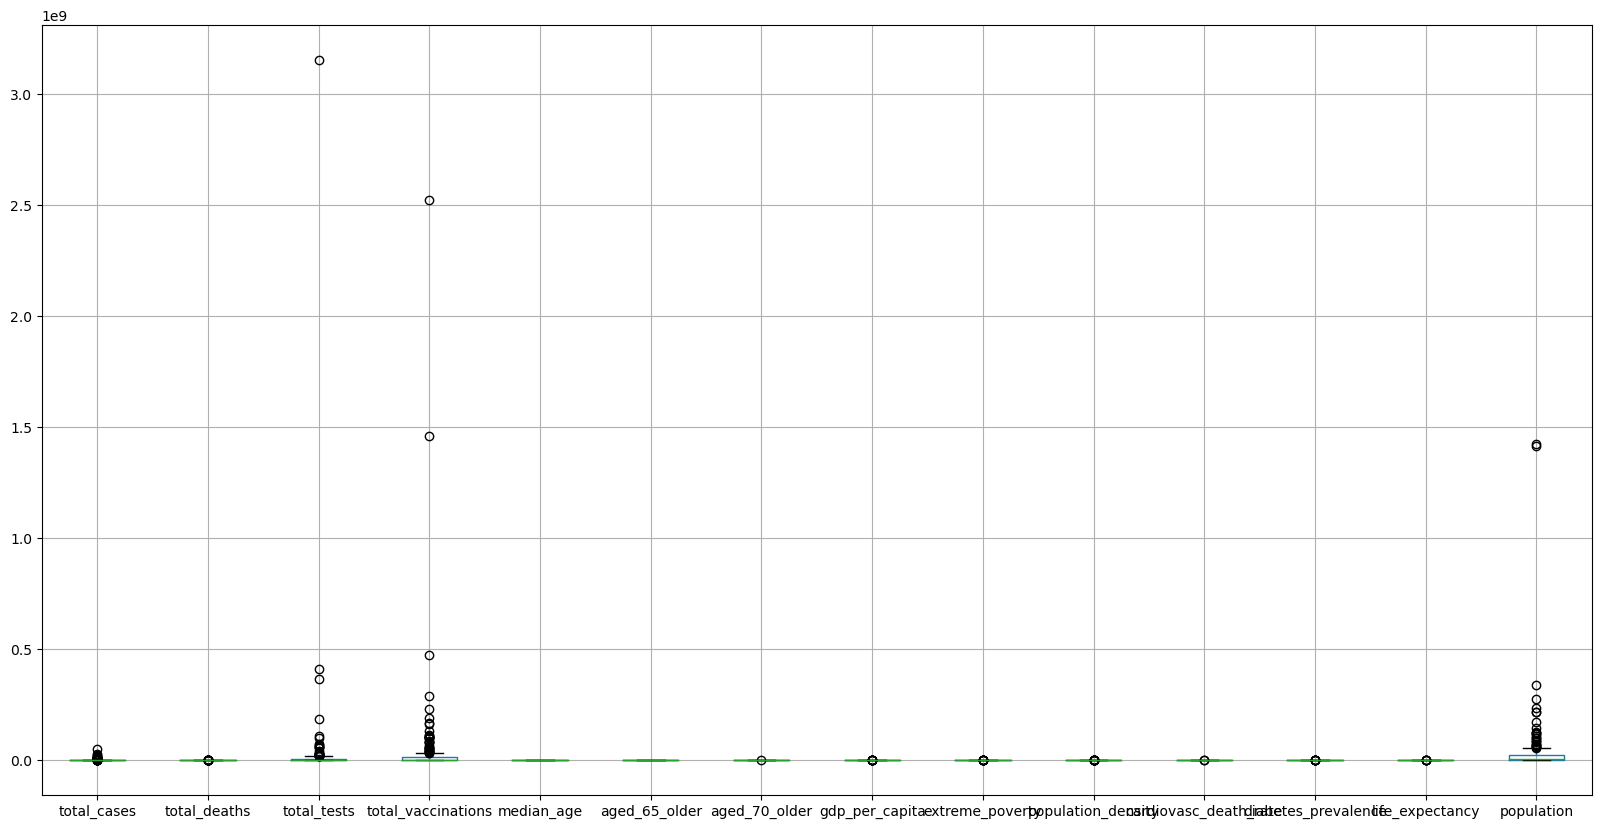

In [333]:
width = 20
height = 10
fig, ax = plt.subplots(figsize=(width, height))
boxplot = mean_df.boxplot(column=['total_cases','total_deaths','total_tests','total_vaccinations','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','population_density','cardiovasc_death_rate','diabetes_prevalence','life_expectancy','population']) 
plt.show()

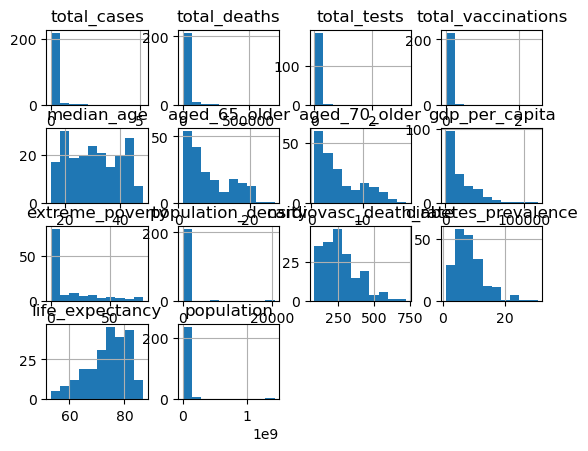

In [334]:
mean_df.hist()
plt.show()

<Axes: >

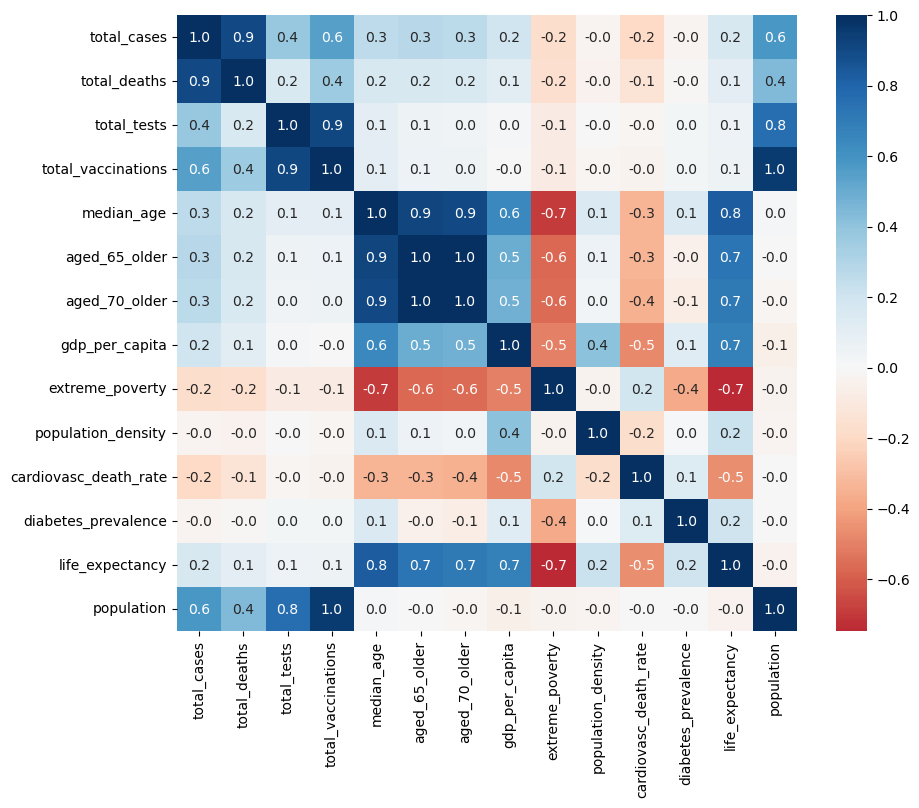

In [335]:
correlation= mean_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)
sns.heatmap(correlation, annot=True, fmt=".1f", cmap="RdBu",center=0, ax=ax)


In [336]:
Q1 = mean_df.quantile(0.25)
Q3 = mean_df.quantile(0.75)
IQR = Q3 - Q1

remove_outliers = ['median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','life_expectancy']


rem_outliers = mean_df[((mean_df < (Q1 - 1.5 * IQR)) | (mean_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print the DataFrame without outliers 
print("\nData without outliers:\n", rem_outliers)


Data without outliers:
                                              total_cases   total_deaths  \
continent     location                                                    
Africa        Burundi                       2.506470e+04       9.877740   
              Central African Republic      1.062775e+04      93.403141   
              Chad                          5.092830e+03     159.908625   
              Democratic Republic of Congo  5.669572e+04    1032.076858   
              Egypt                         3.205363e+05   16663.216393   
...                                                  ...            ...   
South America Brazil                        2.093050e+07  474253.121387   
              Chile                         2.444097e+06   37992.518641   
              Colombia                      4.090359e+06   97973.097763   
              Ecuador                       5.833631e+05   25462.103789   
              Peru                          2.497620e+06  161724.922386   


In [337]:
columns_to_fill_with_zero = ['total_cases','total_deaths','total_tests','total_vaccinations']
mean_df[columns_to_fill_with_zero] = mean_df[columns_to_fill_with_zero].fillna(0)
print(mean_df)

                             total_cases   total_deaths   total_tests  \
continent     location                                                  
Africa        Algeria       1.755355e+05    4790.356370  2.305530e+05   
              Angola        6.097249e+04    1280.989556  1.428346e+06   
              Benin         1.682770e+04     118.933447  6.043100e+05   
              Botswana      1.789587e+05    1683.068106  7.925107e+05   
              Burkina Faso  1.421086e+04     245.033912  3.132354e+05   
...                                  ...            ...           ...   
South America Paraguay      4.248368e+05   12227.139901  1.021679e+06   
              Peru          2.497620e+06  161724.922386  1.134355e+07   
              Suriname      4.480402e+04     822.845638  3.459921e+04   
              Uruguay       5.160635e+05    4655.151085  2.077649e+06   
              Venezuela     3.365550e+05    3706.331391  0.000000e+00   

                            total_vaccinations  me

In [338]:
columns_to_fill_with_median = {
    'median_age': mean_df['median_age'].median(),
    'aged_65_older': mean_df['aged_65_older'].median(),
    'aged_70_older': mean_df['aged_70_older'].median(),
    'gdp_per_capita': mean_df['gdp_per_capita'].median(),
    'extreme_poverty': mean_df['extreme_poverty'].median(),
    'population_density': mean_df['population_density'].median(),
    'cardiovasc_death_rate': mean_df['cardiovasc_death_rate'].median(),
    'diabetes_prevalence': mean_df['diabetes_prevalence'].median(),
    'life_expectancy': mean_df['life_expectancy'].median(),
    # Add more columns and their median values as needed
}

# Fill missing values with the corresponding median for each column
for col, median_val in columns_to_fill_with_median.items():
    mean_df[col] = mean_df[col].fillna(value=median_val)

print(mean_df)

                             total_cases   total_deaths   total_tests  \
continent     location                                                  
Africa        Algeria       1.755355e+05    4790.356370  2.305530e+05   
              Angola        6.097249e+04    1280.989556  1.428346e+06   
              Benin         1.682770e+04     118.933447  6.043100e+05   
              Botswana      1.789587e+05    1683.068106  7.925107e+05   
              Burkina Faso  1.421086e+04     245.033912  3.132354e+05   
...                                  ...            ...           ...   
South America Paraguay      4.248368e+05   12227.139901  1.021679e+06   
              Peru          2.497620e+06  161724.922386  1.134355e+07   
              Suriname      4.480402e+04     822.845638  3.459921e+04   
              Uruguay       5.160635e+05    4655.151085  2.077649e+06   
              Venezuela     3.365550e+05    3706.331391  0.000000e+00   

                            total_vaccinations  me

In [339]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numerical_features= ['total_cases','total_deaths','total_tests','total_vaccinations','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','population_density','cardiovasc_death_rate','diabetes_prevalence','life_expectancy','population']
mean_df[numerical_features]=scaler.fit_transform(mean_df[numerical_features])
print(mean_df)

                            total_cases  total_deaths  total_tests  \
continent     location                                               
Africa        Algeria         -0.259616     -0.201735    -0.108939   
              Angola          -0.284538     -0.255749    -0.103099   
              Benin           -0.294141     -0.273635    -0.107117   
              Botswana        -0.258872     -0.249560    -0.106199   
              Burkina Faso    -0.294710     -0.271694    -0.108536   
...                                 ...           ...          ...   
South America Paraguay        -0.205385     -0.087274    -0.105082   
              Peru             0.245514      2.213689    -0.054762   
              Suriname        -0.288055     -0.262800    -0.109894   
              Uruguay         -0.185540     -0.203816    -0.099934   
              Venezuela       -0.224589     -0.218420    -0.110063   

                            total_vaccinations  median_age  aged_65_older  \
continent   

In [340]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
covid_pca=pca.fit_transform(mean_df)
print('covid variance:',pca.explained_variance_ratio_)


covid variance: [0.32817454 0.2322452 ]


In [341]:
all_predictors = ['total_deaths','total_tests', 'total_vaccinations','median_age','aged_65_older',
              'aged_70_older','gdp_per_capita', 'extreme_poverty','population_density','cardiovasc_death_rate', 'diabetes_prevalence','life_expectancy','population']
outcome = 'total_cases'
# partition data
X = pd.get_dummies(mean_df[all_predictors], drop_first=True)
y = mean_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

Linear Regression

In [342]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model
def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)
allVariables = train_X.columns
best_model, best_variables = backward_elimination(allVariables, train_model,score_model, verbose=True)
print(best_variables)
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))


Variables: total_deaths, total_tests, total_vaccinations, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, population_density, cardiovasc_death_rate, diabetes_prevalence, life_expectancy, population
Start: score=162.29
Step: score=160.29, remove aged_65_older
Step: score=158.40, remove life_expectancy
Step: score=156.70, remove population_density
Step: score=155.00, remove total_tests
Step: score=153.30, remove extreme_poverty
Step: score=151.76, remove diabetes_prevalence
Step: score=151.05, remove cardiovasc_death_rate
Step: score=151.05, remove None
['total_deaths', 'total_vaccinations', 'median_age', 'aged_70_older', 'gdp_per_capita', 'population']

Regression statistics

                      Mean Error (ME) : 0.0176
       Root Mean Squared Error (RMSE) : 0.3340
            Mean Absolute Error (MAE) : 0.1718
          Mean Percentage Error (MPE) : -87.3136
Mean Absolute Percentage Error (MAPE) : 131.3493


In [343]:
# The initial model is the constant model - this requires special handling
# in train_model and score_model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)
best_model, best_variables = forward_selection(train_X.columns, train_model, score_model,
verbose=True)
print(best_variables)


Variables: total_deaths, total_tests, total_vaccinations, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, population_density, cardiovasc_death_rate, diabetes_prevalence, life_expectancy, population
Start: score=463.52, constant
Step: score=236.05, add total_deaths
Step: score=184.16, add total_vaccinations
Step: score=164.98, add aged_70_older
Step: score=160.41, add population
Step: score=158.49, add median_age
Step: score=151.05, add gdp_per_capita
Step: score=151.05, add None
['total_deaths', 'total_vaccinations', 'aged_70_older', 'population', 'median_age', 'gdp_per_capita']


In [344]:
predictors = ['total_deaths', 'total_vaccinations', 'aged_70_older', 'population', 'median_age', 'gdp_per_capita']
outcome = 'total_cases'
# partition data
X = pd.get_dummies(mean_df[predictors], drop_first=True)
y = mean_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4,
random_state=1)


In [345]:
# Create the DataFrame
train = pd.DataFrame(train_X)

file_path = "train_x.csv"

# Print the training data (train_x) to the CSV file
train_X.to_csv(file_path, index=False)

In [346]:
valid_y

continent      location      
Asia           Georgia          -0.098148
South America  Venezuela        -0.224589
Oceania        American Samoa   -0.296598
Europe         Faeroe Islands   -0.294431
Asia           Oman             -0.240784
                                   ...   
Africa         Eritrea          -0.296451
               Burundi          -0.292349
North America  Greenland        -0.296606
               Cayman Islands   -0.294957
Africa         South Africa      0.256351
Name: total_cases, Length: 98, dtype: float64

In [347]:
covid_lm = LinearRegression()
covid_lm .fit(train_X, train_y)
# print coefficients
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': covid_lm .coef_}))
# print performance measures (training data)
regressionSummary(train_y, covid_lm .predict(train_X))

            Predictor  coefficient
0        total_deaths     0.836403
1  total_vaccinations     0.780397
2       aged_70_older     0.314432
3          population    -0.614808
4          median_age    -0.284998
5      gdp_per_capita     0.129440

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.3855
            Mean Absolute Error (MAE) : 0.1939
          Mean Percentage Error (MPE) : 13.1263
Mean Absolute Percentage Error (MAPE) : 59.8542


In [348]:
# Use predict() to make predictions on a new set
covid_lm_pred = covid_lm.predict(valid_X)
result = pd.DataFrame({'Predicted': covid_lm_pred, 'Actual': valid_y,
'Residual': valid_y - covid_lm_pred})
print(result.head(20))
# print performance measures (validation data)
regressionSummary(valid_y, covid_lm_pred)


                              Predicted    Actual  Residual
continent     location                                     
Asia          Georgia         -0.033618 -0.098148 -0.064530
South America Venezuela       -0.318101 -0.224589  0.093512
Oceania       American Samoa  -0.348357 -0.296598  0.051759
Europe        Faeroe Islands  -0.348352 -0.294431  0.053920
Asia          Oman            -0.368916 -0.240784  0.128132
Oceania       Niue            -0.348560 -0.297728  0.050833
Asia          Afghanistan     -0.332991 -0.270097  0.062894
North America Haiti           -0.358891 -0.293040  0.065851
              Cuba            -0.179353 -0.161191  0.018163
Africa        Burkina Faso    -0.307598 -0.294710  0.012888
Oceania       Palau           -0.341916 -0.296911  0.045005
              Tonga           -0.128749 -0.295322 -0.166573
Europe        Croatia          0.120042 -0.155689 -0.275732
Asia          Vietnam         -0.109649  0.692837  0.802485
North America Belize          -0.345867 

In [349]:
result

Predicted    Actual  Residual
continent     location                                     
Asia          Georgia         -0.033618 -0.098148 -0.064530
South America Venezuela       -0.318101 -0.224589  0.093512
Oceania       American Samoa  -0.348357 -0.296598  0.051759
Europe        Faeroe Islands  -0.348352 -0.294431  0.053920
Asia          Oman            -0.368916 -0.240784  0.128132
...                                 ...       ...       ...
Africa        Eritrea         -0.223025 -0.296451 -0.073426
              Burundi         -0.264775 -0.292349 -0.027574
North America Greenland       -0.348379 -0.296606  0.051774
              Cayman Islands  -0.084447 -0.294957 -0.210511
Africa        South Africa     0.394092  0.256351 -0.137741

[98 rows x 3 columns]

In [350]:
# Create the DataFrame
result1 = pd.DataFrame(result)

file_path = "result.csv"

# Print the training data (train_x) to the CSV file
result.to_csv(file_path, index=False)

In [351]:
# user grid search to find optimized tree
param_grid = {
'max_depth': [5, 10, 15, 20, 25],
'min_impurity_decrease': [0, 0.001, 0.005, 0.01],
'min_samples_split': [10, 20, 30, 40, 50],
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)
param_grid = {
'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008],
'min_samples_split': [14, 15, 16, 18, 20, ],
}

gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)
regTree = gridSearch.best_estimator_
# Initialize and train the decision tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(train_X, train_y)

# Make predictions on the test data
decision_tree_predictions = decision_tree_model.predict(valid_X)
print(decision_tree_predictions)
regressionSummary(train_y, regTree.predict(train_X))
regressionSummary(valid_y, regTree.predict(valid_X))


Initial parameters:  {'max_depth': 15, 'min_impurity_decrease': 0, 'min_samples_split': 10}
Improved parameters:  {'max_depth': 12, 'min_impurity_decrease': 0, 'min_samples_split': 14}
[-0.21540069 -0.21232275 -0.29650169 -0.29650169 -0.20338578 -0.29779605
 -0.08342443 -0.28549818 -0.2230644  -0.28963162 -0.29753408 -0.29667021
 -0.17529623  0.67833957 -0.29320008 -0.26664414 -0.28093136 -0.27622662
 -0.2759464   0.5919877  -0.29650169 -0.29419118 -0.262349   -0.29419118
  0.14973401 -0.28950379 -0.28111717 -0.16681612 -0.28963162 -0.29320008
 -0.20338578 -0.28007359  0.50647889 -0.29650169 -0.16323051 -0.29667021
 -0.28453755 -0.28549818 -0.27961584 -0.2962526  -0.17367327 -0.08342443
 -0.21232275  4.25527756 -0.29309823  0.50647889 -0.16323051 -0.28963162
 -0.29608501 -0.14835312 -0.14835312 -0.29653584 -0.29558949 -0.29779605
 -0.29753408 -0.28523361 -0.16323051 -0.17529623 -0.29106772  1.21755278
 -0.28963162 -0.16737098 -0.2946317  -0.27961584 -0.28546788 -0.20338578
 -0.29320008

In [352]:
import numpy as np

# Assuming your variables are train_X, train_y, valid_X

from sklearn.tree import DecisionTreeRegressor

# Initialize and train the decision tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(train_X, train_y)

# Make predictions on the test data
decision_tree_predictions = decision_tree_model.predict(valid_X)
print(decision_tree_predictions)

[-0.21540069 -0.21232275 -0.29650169 -0.29650169 -0.20338578 -0.29779605
 -0.08342443 -0.28549818 -0.2230644  -0.28963162 -0.29753408 -0.29667021
 -0.17529623  0.67833957 -0.29320008 -0.26664414 -0.28093136 -0.27622662
 -0.2759464   0.5919877  -0.29650169 -0.29419118 -0.262349   -0.29419118
  0.14973401 -0.28950379 -0.28111717 -0.16681612 -0.28963162 -0.29320008
 -0.20338578 -0.28007359  0.50647889 -0.29650169 -0.16323051 -0.29667021
 -0.28453755 -0.28549818 -0.27961584 -0.2962526  -0.17367327 -0.08342443
 -0.21232275  4.25527756 -0.29309823  0.50647889 -0.16323051 -0.28963162
 -0.29608501 -0.14835312 -0.14835312 -0.29653584 -0.29558949 -0.29779605
 -0.29753408 -0.28523361 -0.16323051 -0.17529623 -0.29106772  1.21755278
 -0.28963162 -0.16737098 -0.2946317  -0.27961584 -0.28546788 -0.20338578
 -0.29320008 -0.29650169 -0.29780109  0.2252165  -0.29780109 -0.29483863
 -0.29682753 -0.16210116 -0.25442714 -0.2954892  -0.21031055 -0.2954892
 -0.29764799 -0.29561905 -0.29320008 -0.2920909  -0.

KNN Regression Model

In [353]:
#Building k-NN Models and Evaluating Performance
k_values = range(1, 14)
models = {}
label_encoder = LabelEncoder()
# Fit the encoder on the target labels and transform them
train_y_encoded = label_encoder.fit_transform(train_y)
valid_y_encoded = label_encoder.fit_transform(valid_y)

In [354]:
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(train_X, train_y_encoded)
    y_pred = knn_classifier.predict(valid_X)
    accuracy = accuracy_score(valid_y_encoded, y_pred)
    models[k] = {'model': knn_classifier, 'accuracy': accuracy}

In [355]:
#Determine which k value performs best
best_k = max(models, key=lambda k: models[k]["accuracy"])

In [356]:
# Print the accuracy of each k-NN model
for k, model_info in models.items():
    print(f"k = {k}, Accuracy: {model_info['accuracy']}")

k = 1, Accuracy: 0.061224489795918366
k = 2, Accuracy: 0.08163265306122448
k = 3, Accuracy: 0.09183673469387756
k = 4, Accuracy: 0.08163265306122448
k = 5, Accuracy: 0.07142857142857142
k = 6, Accuracy: 0.061224489795918366
k = 7, Accuracy: 0.05102040816326531
k = 8, Accuracy: 0.05102040816326531
k = 9, Accuracy: 0.061224489795918366
k = 10, Accuracy: 0.061224489795918366
k = 11, Accuracy: 0.05102040816326531
k = 12, Accuracy: 0.05102040816326531
k = 13, Accuracy: 0.05102040816326531


In [357]:
#Use the best_k model for prediction of total_cases
best_model = models[best_k]["model"]
best_model

KNeighborsClassifier(n_neighbors=3)

The k-NN model with k=3 have the highest accuracy of 0.09184.

So we choose k=3 as this model performs well on the dataset.

In [358]:
# Initialize KNN Regressor
k = 3  # Choose the number of neighbors (K)
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Fit the KNN Regressor on the training data
knn_regressor.fit(train_X, train_y)

# Make predictions on the test data
y_pred = knn_regressor.predict(valid_X)

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(valid_y, y_pred)
print(mse)

0.024575714869829717


In [359]:
y_pred

array([-0.27222205, -0.26901818, -0.29677279, -0.29587431, -0.2310713 ,
       -0.29774808, -0.26800206, -0.27401186, -0.25298162, -0.28348802,
       -0.29738677, -0.29234096, -0.17023378, -0.17821802, -0.21638495,
       -0.29473353, -0.19364608, -0.27622121, -0.29487426,  0.73412913,
       -0.29677279, -0.28549691, -0.24555784, -0.21773424, -0.16600649,
       -0.17812073, -0.29252399, -0.19273536, -0.28550497, -0.21106765,
       -0.29407588, -0.28876833, -0.06899148, -0.29587431, -0.2949128 ,
       -0.29397815, -0.27490936, -0.27996299, -0.21613213, -0.2943335 ,
        0.2118253 , -0.27490936, -0.28875491,  6.1941694 , -0.25143485,
        0.15452662, -0.2438595 , -0.29543471, -0.28492903, -0.26930831,
       -0.26850122, -0.29725515, -0.2943335 , -0.29774808, -0.29758089,
       -0.12026948, -0.19765076, -0.29022606, -0.2800349 , -0.01822742,
       -0.28205884, -0.23168056, -0.24342391, -0.26797407, -0.28336977,
        0.09418566, -0.29440273, -0.29677279, -0.29576086,  0.08

In [360]:
regressionSummary(valid_y, y_pred)


Regression statistics

                      Mean Error (ME) : 0.0026
       Root Mean Squared Error (RMSE) : 0.1568
            Mean Absolute Error (MAE) : 0.0743
          Mean Percentage Error (MPE) : -18.0800
Mean Absolute Percentage Error (MAPE) : 51.3061


K-Means Clustering

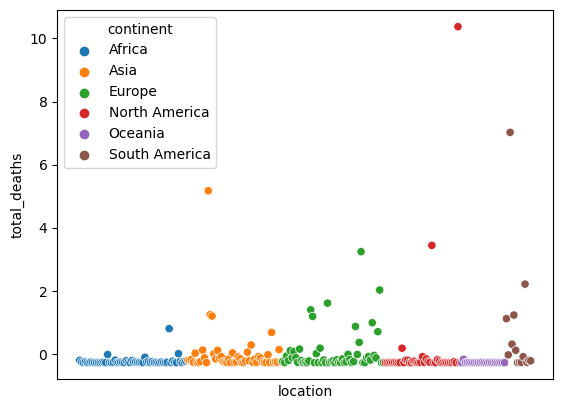

In [361]:
#Scatter plot of total_deaths and location
sns.scatterplot(data=mean_df, x = 'location', y = 'total_deaths', hue = 'continent')
plt.xticks([])
plt.show()

C:\Users\femym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\femym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\femym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\femym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

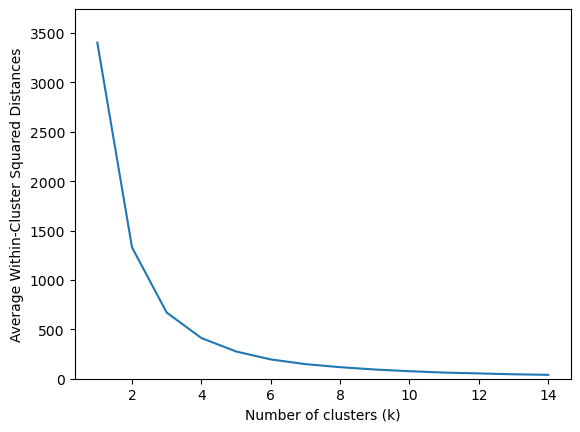

In [362]:
#Generating the Elbow plot for determining the optimum number of clusters, K
inertia = []
for n_clusters in range(1, 15):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(mean_df)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 15), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

From the Elbow plot we could see that the optimum value of k is k = 6.

In [363]:
# Fit KMeans model and Adjust the number of clusters as needed
mean_df = mean_df.apply(lambda x: x.astype('float64'))
kmeans = KMeans(n_clusters=6, random_state=0).fit(mean_df[["total_deaths"]])

C:\Users\femym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\femym\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [364]:
# Cluster membership
cluster_labels = kmeans.labels_

# Create a Series with cluster labels and index from 'mean_df'
memb = pd.Series(cluster_labels, index=mean_df.index)

In [365]:
## Add a 'Cluster' column to the DataFrame
mean_df['Cluster'] = memb

# Display the updated DataFrame
print(mean_df)

                            total_cases  total_deaths  total_tests  \
continent     location                                               
Africa        Algeria         -0.259616     -0.201735    -0.108939   
              Angola          -0.284538     -0.255749    -0.103099   
              Benin           -0.294141     -0.273635    -0.107117   
              Botswana        -0.258872     -0.249560    -0.106199   
              Burkina Faso    -0.294710     -0.271694    -0.108536   
...                                 ...           ...          ...   
South America Paraguay        -0.205385     -0.087274    -0.105082   
              Peru             0.245514      2.213689    -0.054762   
              Suriname        -0.288055     -0.262800    -0.109894   
              Uruguay         -0.185540     -0.203816    -0.099934   
              Venezuela       -0.224589     -0.218420    -0.110063   

                            total_vaccinations  median_age  aged_65_older  \
continent   

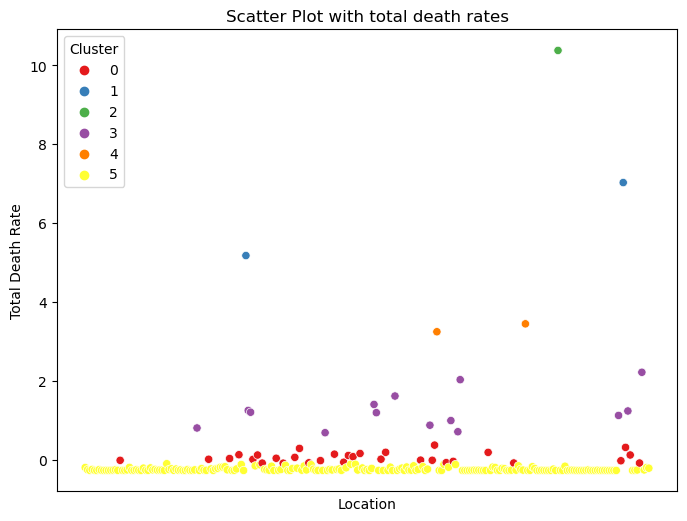

In [366]:
# Set the figure size
plt.figure(figsize=(8,6))  # Adjust width and height as needed

# Select a subset of the data
#subset_rows = cluster_columns.sample(n=2000, random_state=42)

# Create the scatter plot
sns.scatterplot(data=mean_df, x='location', y='total_deaths', hue='Cluster', palette='Set1')

# Rotate x-axis and y-axis labels for better readability
#plt.xticks(rotation=90)
plt.xticks([])

# Add legend and labels
plt.legend(title='Cluster')
plt.xlabel('Location')
plt.ylabel('Total Death Rate')
plt.title('Scatter Plot with total death rates')

# Show the plot
plt.show()